In [1]:
import pandas as pd
df= pd.read_csv("DataWithSentiment_Topics.csv")
df

,Unnamed: 0,title,rating,date,review,CommentAferPreproc,sentiment,Topic,Topic_label
0,0,Avis La Banque Postale,"2,2 sur 5 étoiles",14/07/2022,client depuis plus de 20 ans à la banque posta...,client depuis plus 20 ans banque postale compt...,Positive,6,accueil
1,1,Avis La Banque Postale,"1,8 sur 5 étoiles",14/07/2022,"cliente depuis 40 ans, je ferme tous les livre...",cliente depuis 40 ans ferme tous livrets foyer...,Positive,6,accueil
2,2,Avis La Banque Postale,"1,6 sur 5 étoiles",12/07/2022,"avec mon épouse, nous sommes clients de lbp de...",épouse clients lbp depuis 40 ans suite problèm...,Negative,1,frais
3,3,Avis La Banque Postale,"2,0 sur 5 étoiles",11/07/2022,"après 20 ans à la banque postale, je ne peux p...",après 20 ans banque postale peux utiliser arge...,Positive,6,accueil
4,4,Avis La Banque Postale,"2,8 sur 5 étoiles",09/07/2022,la banque postale a transféré un total de 60 0...,banque postale transféré total 60 000 compte c...,Negative,6,accueil
...,...,...,...,...,...,...,...,...,...
1476,1476,Avis Klarna,"4,0 sur 5 étoiles",28/05/2022,"compte tenu de l'exclusivité de leur service, ...",compte tenu exclusivité service peux souligner...,Positive,3,service
1477,1477,Avis Veritas Card,5 sur 5 étoiles,12/04/2022,très bien. juste compliqué quand on voudrait l...,très bien juste compliqué quand voudrait avoir...,Positive,4,service
1478,1478,Avis Western Union,"4,6 sur 5 étoiles",19/04/2022,les tarifs sont parfois un peu élévés mais au ...,tarifs parfois peu élévés moins cas problèmes ...,Positive,0,service
1479,1479,Avis WorldRemit,"1,4 sur 5 étoiles",15/12/2021,"mauvaise expérience, mon neveu attend toujours...",mauvaise expérience neveu attend toujours arge...,Negative,6,accueil


In [2]:
df = df.drop("Unnamed: 0", axis=1)

In [3]:
df

,title,rating,date,review,CommentAferPreproc,sentiment,Topic,Topic_label
0,Avis La Banque Postale,"2,2 sur 5 étoiles",14/07/2022,client depuis plus de 20 ans à la banque posta...,client depuis plus 20 ans banque postale compt...,Positive,6,accueil
1,Avis La Banque Postale,"1,8 sur 5 étoiles",14/07/2022,"cliente depuis 40 ans, je ferme tous les livre...",cliente depuis 40 ans ferme tous livrets foyer...,Positive,6,accueil
2,Avis La Banque Postale,"1,6 sur 5 étoiles",12/07/2022,"avec mon épouse, nous sommes clients de lbp de...",épouse clients lbp depuis 40 ans suite problèm...,Negative,1,frais
3,Avis La Banque Postale,"2,0 sur 5 étoiles",11/07/2022,"après 20 ans à la banque postale, je ne peux p...",après 20 ans banque postale peux utiliser arge...,Positive,6,accueil
4,Avis La Banque Postale,"2,8 sur 5 étoiles",09/07/2022,la banque postale a transféré un total de 60 0...,banque postale transféré total 60 000 compte c...,Negative,6,accueil
...,...,...,...,...,...,...,...,...
1476,Avis Klarna,"4,0 sur 5 étoiles",28/05/2022,"compte tenu de l'exclusivité de leur service, ...",compte tenu exclusivité service peux souligner...,Positive,3,service
1477,Avis Veritas Card,5 sur 5 étoiles,12/04/2022,très bien. juste compliqué quand on voudrait l...,très bien juste compliqué quand voudrait avoir...,Positive,4,service
1478,Avis Western Union,"4,6 sur 5 étoiles",19/04/2022,les tarifs sont parfois un peu élévés mais au ...,tarifs parfois peu élévés moins cas problèmes ...,Positive,0,service
1479,Avis WorldRemit,"1,4 sur 5 étoiles",15/12/2021,"mauvaise expérience, mon neveu attend toujours...",mauvaise expérience neveu attend toujours arge...,Negative,6,accueil


In [4]:
df["Topic"].unique()

array([6, 1, 0, 2, 4, 5, 3], dtype=int64)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Charger votre jeu de données
data = df  # Assurez-vous de remplacer "votre_fichier.csv" par le chemin vers votre fichier

# Diviser les données en caractéristiques (X) et étiquettes de classification (y)
X = data["CommentAferPreproc"]
y = data["Topic_label"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
from sklearn.preprocessing import LabelEncoder
# Drop rows with missing values in the "CommentAferPreproc" column
data.dropna(subset=["CommentAferPreproc"], inplace=True)

# Dividing the data into features (X) and classification labels (y)
X = data["CommentAferPreproc"]
y = data["Topic_label"]

# Convert string labels to numeric labels using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating TF-IDF vector representations of the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_tfidf, y_train)
xgb_predictions = xgb_model.predict(X_test_tfidf)

# Classification Reports
svm_classification_report = classification_report(y_test, svm_predictions)
xgb_classification_report = classification_report(y_test, xgb_predictions)

print("Classification Report - SVM:\n", svm_classification_report)
print("\nClassification Report - XGBoost:\n", xgb_classification_report)

Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.70      0.58      0.64        84
           1       0.71      0.18      0.29        28
           2       1.00      0.17      0.29        18
           3       0.70      0.91      0.79       166

    accuracy                           0.70       296
   macro avg       0.78      0.46      0.50       296
weighted avg       0.72      0.70      0.67       296


Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.71      0.43      0.53        84
           1       0.36      0.14      0.21        28
           2       0.57      0.22      0.32        18
           3       0.67      0.92      0.78       166

    accuracy                           0.67       296
   macro avg       0.58      0.43      0.46       296
weighted avg       0.65      0.67      0.63       296



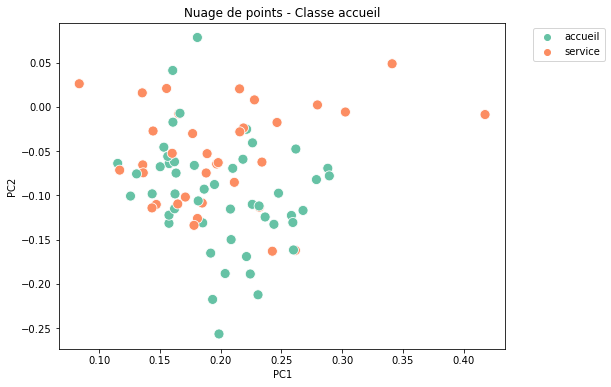

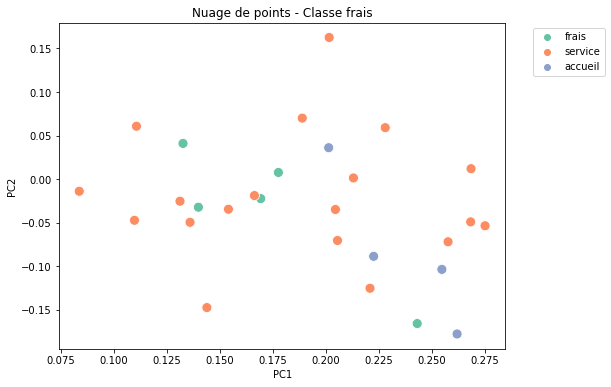

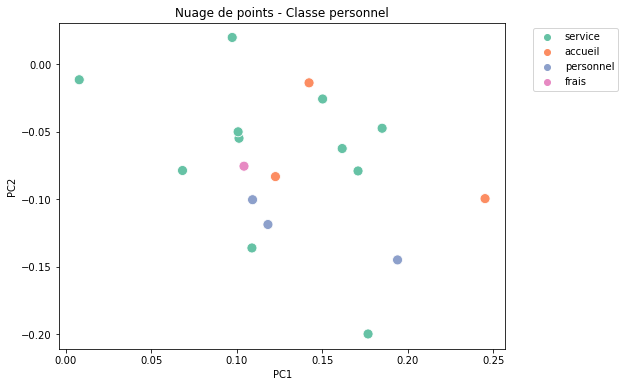

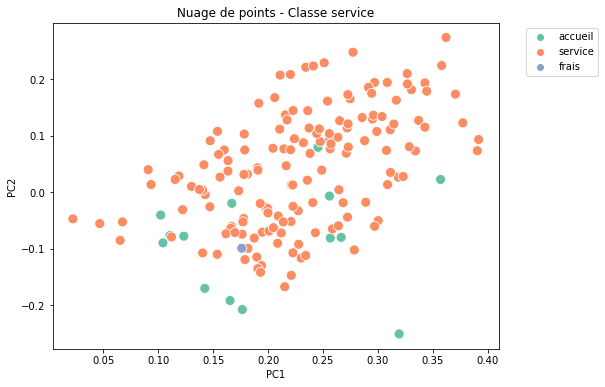

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

# Réduire la dimension des données pour la visualisation
svd = TruncatedSVD(n_components=2)
X_test_tfidf_svd = svd.fit_transform(X_test_tfidf)

# Créer un DataFrame pour stocker les données de test, les vraies étiquettes et les prédictions SVM
df_vis = pd.DataFrame({'PC1': X_test_tfidf_svd[:, 0],
                       'PC2': X_test_tfidf_svd[:, 1],
                       'Vraies étiquettes': label_encoder.inverse_transform(y_test),
                       'Prédictions SVM': label_encoder.inverse_transform(svm_predictions)})

# Créer un nuage de points séparé pour chaque classe
classes = label_encoder.classes_

for class_label in classes:
    # Sélectionner les données pour la classe spécifique
    df_class = df_vis[df_vis['Vraies étiquettes'] == class_label]

    # Nuage de points pour visualiser les résultats SVM pour la classe spécifique
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Prédictions SVM', data=df_class, palette='Set2', s=100)
    plt.title(f'Nuage de points - Classe {class_label}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = df  # Replace "your_file.csv" with the path to your file

# Drop rows with missing values in the "CommentAferPreproc" column
data.dropna(subset=["CommentAferPreproc"], inplace=True)

# Dividing the data into features (X) and classification labels (y)
X = data["CommentAferPreproc"]
y = data["Topic_label"]

# Convert string labels to numeric labels using LabelEncoder
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Inverse mapping for converting numeric labels back to class names
inverse_class_mapping = {v: k for k, v in class_mapping.items()}

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Creating TF-IDF vector representations of the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# SVM with optimized hyperparameters
svm_model = SVC(kernel='linear', C=1.0)  # You can adjust C based on GridSearchCV results
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)
svm_predictions_names = [inverse_class_mapping[prediction] for prediction in svm_predictions]

# XGBoost with optimized hyperparameters
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=3)  # You can adjust parameters based on experimentation
xgb_model.fit(X_train_tfidf, y_train)
xgb_predictions = xgb_model.predict(X_test_tfidf)
xgb_predictions_names = [inverse_class_mapping[prediction] for prediction in xgb_predictions]

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)  # You can adjust parameters based on experimentation
logreg_model.fit(X_train_tfidf, y_train)
logreg_predictions = logreg_model.predict(X_test_tfidf)
logreg_predictions_names = [inverse_class_mapping[prediction] for prediction in logreg_predictions]

# Classification Reports
svm_classification_report = classification_report(y_test, svm_predictions, target_names=label_encoder.classes_)
xgb_classification_report = classification_report(y_test, xgb_predictions, target_names=label_encoder.classes_)
logreg_classification_report = classification_report(y_test, logreg_predictions, target_names=label_encoder.classes_)

print("Classification Report - SVM:\n", svm_classification_report)
print("\nClassification Report - XGBoost:\n", xgb_classification_report)
print("\nClassification Report - Logistic Regression:\n", logreg_classification_report)


Classification Report - SVM:
               precision    recall  f1-score   support

     accueil       0.70      0.58      0.64        84
       frais       0.71      0.18      0.29        28
   personnel       1.00      0.17      0.29        18
     service       0.70      0.91      0.79       166

    accuracy                           0.70       296
   macro avg       0.78      0.46      0.50       296
weighted avg       0.72      0.70      0.67       296


Classification Report - XGBoost:
               precision    recall  f1-score   support

     accueil       0.77      0.39      0.52        84
       frais       0.62      0.18      0.28        28
   personnel       0.75      0.17      0.27        18
     service       0.66      0.96      0.79       166

    accuracy                           0.68       296
   macro avg       0.70      0.43      0.46       296
weighted avg       0.69      0.68      0.63       296


Classification Report - Logistic Regression:
               prec

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
import numpy as np

# Load your dataset
data = df  # Replace "your_file.csv" with the path to your file

# Drop rows with missing values in the "CommentAferPreproc" column
data.dropna(subset=["CommentAferPreproc"], inplace=True)

# Dividing the data into features (X) and classification labels (y)
X = data["CommentAferPreproc"]
y = data["Topic_label"]

# Convert string labels to numeric labels using LabelEncoder
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Inverse mapping for converting numeric labels back to class names
inverse_class_mapping = {v: k for k, v in class_mapping.items()}

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Create Word2Vec embeddings
word2vec_model = Word2Vec(X_train, vector_size=100, window=5, min_count=1, sg=1)  # Adjust parameters based on your needs

# Transform the text data into embeddings
def text_to_embeddings(text):
    embeddings = []
    for word in text.split():
        if word in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[word])
    if len(embeddings) == 0:
        return np.zeros(100)  # Replace with the appropriate dimension
    return np.mean(embeddings, axis=0)

X_train_embeddings = [text_to_embeddings(text) for text in X_train]
X_test_embeddings = [text_to_embeddings(text) for text in X_test]

# SVM
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_embeddings, y_train)
svm_predictions = svm_model.predict(X_test_embeddings)
svm_predictions_names = [inverse_class_mapping[prediction] for prediction in svm_predictions]

# XGBoost
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train_embeddings, y_train)
xgb_predictions = xgb_model.predict(X_test_embeddings)
xgb_predictions_names = [inverse_class_mapping[prediction] for prediction in xgb_predictions]

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_embeddings, y_train)
logreg_predictions = logreg_model.predict(X_test_embeddings)
logreg_predictions_names = [inverse_class_mapping[prediction] for prediction in logreg_predictions]

# Classification Reports
svm_classification_report = classification_report(y_test, svm_predictions, target_names=label_encoder.classes_)
xgb_classification_report = classification_report(y_test, xgb_predictions, target_names=label_encoder.classes_)
logreg_classification_report = classification_report(y_test, logreg_predictions, target_names=label_encoder.classes_)

print("Classification Report - SVM:\n", svm_classification_report)
print("\nClassification Report - XGBoost:\n", xgb_classification_report)
print("\nClassification Report - Logistic Regression:\n", logreg_classification_report)


Classification Report - SVM:
               precision    recall  f1-score   support

     accueil       0.00      0.00      0.00        84
       frais       0.00      0.00      0.00        28
   personnel       0.00      0.00      0.00        18
     service       0.56      1.00      0.72       166

    accuracy                           0.56       296
   macro avg       0.14      0.25      0.18       296
weighted avg       0.31      0.56      0.40       296


Classification Report - XGBoost:
               precision    recall  f1-score   support

     accueil       0.00      0.00      0.00        84
       frais       0.00      0.00      0.00        28
   personnel       0.00      0.00      0.00        18
     service       0.56      1.00      0.72       166

    accuracy                           0.56       296
   macro avg       0.14      0.25      0.18       296
weighted avg       0.31      0.56      0.40       296


Classification Report - Logistic Regression:
               prec

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = df # Replace "your_file.csv" with the path to your file

# Drop rows with missing values in the "CommentAferPreproc" column
data.dropna(subset=["CommentAferPreproc"], inplace=True)

# Dividing the data into features (X) and classification labels (y)
X = data["CommentAferPreproc"]
y = data["Topic_label"]

# Convert string labels to numeric labels using LabelEncoder
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Inverse mapping for converting numeric labels back to class names
inverse_class_mapping = {v: k for k, v in class_mapping.items()}

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Creating TF-IDF vector representations of the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# SVM with GridSearchCV
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=3)
svm_grid.fit(X_train_tfidf, y_train)
svm_predictions = svm_grid.predict(X_test_tfidf)
svm_predictions_names = [inverse_class_mapping[prediction] for prediction in svm_predictions]

# Classification Report
svm_classification_report = classification_report(y_test, svm_predictions, target_names=label_encoder.classes_)

print("Best Parameters for SVM:", svm_grid.best_params_)
print("\nClassification Report - SVM:\n", svm_classification_report)


Best Parameters for SVM: {'C': 10, 'kernel': 'linear'}

Classification Report - SVM:
               precision    recall  f1-score   support

     accueil       0.68      0.60      0.63        84
       frais       0.56      0.36      0.43        28
   personnel       0.75      0.17      0.27        18
     service       0.74      0.89      0.81       166

    accuracy                           0.71       296
   macro avg       0.68      0.50      0.54       296
weighted avg       0.70      0.71      0.69       296



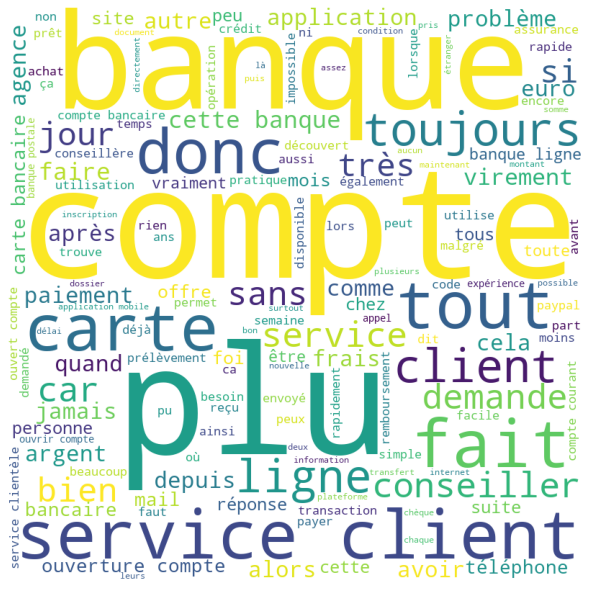

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Drop rows with missing values in the "CommentAferPreproc" column
data.dropna(subset=["CommentAferPreproc"], inplace=True)

# Concatenate all preprocessed comments into a single string
all_comments = ' '.join(data["CommentAferPreproc"])

# Create a Word Cloud for visualization
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(all_comments)

# Plot the Word Cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()